In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../prem/data/raw/used_car_sales_raw.csv")

In [3]:
df.head(10)

,car_brand,fuel_type,transmission,owner_type,city,year,km_driven,price
0,Toyota,Petrol,Manual,Third,Hyderabad,2020,185905 km,₹220627
1,NaN,CNG,Manual,First,Bangalore,2009,28723 km,₹915977
2,BMW,NaN,NaN,First,NaN,2020,133921 km,₹598953
3,Mahindra,NaN,Manual,Third,NaN,2007,112791 km,₹1449397
4,Hyundai,NaN,Manual,Second,NaN,2019,150693 km,₹1383644
5,Hyundai,Electric,Automatic,Third,Kolkata,2007,52657 km,₹494775
6,Maruti,Electric,Automatic,Third,Kolkata,2018,102352 km,₹581247
7,Audi,NaN,Automatic,Second,Mumbai,2020,48162 km,₹1059991
8,Ford,Diesel,Manual,Third,Bangalore,2021,30345 km,₹1247419
9,BMW,CNG,Automatic,Third,Chennai,2022,46846 km,₹1863796


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   car_brand     900 non-null    str  
 1   fuel_type     693 non-null    str  
 2   transmission  795 non-null    str  
 3   owner_type    1000 non-null   str  
 4   city          860 non-null    str  
 5   year          1000 non-null   int64
 6   km_driven     998 non-null    str  
 7   price         998 non-null    str  
dtypes: int64(1), str(7)
memory usage: 62.6 KB


In [6]:
df['price'] = df['price'].str.strip('₹')

In [8]:
df['km_driven'] = df['km_driven'].str.split(" ").str[0]

In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   car_brand     900 non-null    str   
 1   fuel_type     693 non-null    str   
 2   transmission  795 non-null    str   
 3   owner_type    1000 non-null   str   
 4   city          860 non-null    str   
 5   year          1000 non-null   int64 
 6   km_driven     998 non-null    object
 7   price         998 non-null    str   
dtypes: int64(1), object(1), str(6)
memory usage: 62.6+ KB


In [13]:
df.head(10)

,car_brand,fuel_type,transmission,owner_type,city,year,km_driven,price
0,Toyota,Petrol,Manual,Third,Hyderabad,2020,185905,220627
1,NaN,CNG,Manual,First,Bangalore,2009,28723,915977
2,BMW,NaN,NaN,First,NaN,2020,133921,598953
3,Mahindra,NaN,Manual,Third,NaN,2007,112791,1449397
4,Hyundai,NaN,Manual,Second,NaN,2019,150693,1383644
5,Hyundai,Electric,Automatic,Third,Kolkata,2007,52657,494775
6,Maruti,Electric,Automatic,Third,Kolkata,2018,102352,581247
7,Audi,NaN,Automatic,Second,Mumbai,2020,48162,1059991
8,Ford,Diesel,Manual,Third,Bangalore,2021,30345,1247419
9,BMW,CNG,Automatic,Third,Chennai,2022,46846,1863796


In [14]:
df['price'] = pd.to_numeric(df['price'] , errors='coerce')

In [15]:
df.price.info()

<class 'pandas.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: price
Non-Null Count  Dtype  
--------------  -----  
998 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [16]:
df['price'].value_counts()

price
1466851.0    8
352313.0     5
1138457.0    5
1744173.0    5
1410253.0    4
            ..
1819799.0    1
1783887.0    1
376999.0     1
1468608.0    1
313299.0     1
Name: count, Length: 628, dtype: int64

In [17]:
df['price'].unique()

array([ 220627.,  915977.,  598953., 1449397., 1383644.,  494775.,
        581247., 1059991., 1247419., 1863796.,  716552., 1413122.,
       1719110.,  318431., 1409989.,  398113.,  224034.,  304335.,
       1238986.,  658745., 1053646., 1264650.,  776067., 1090562.,
        749001., 1785960., 1328004., 1207177.,  564710., 1957628.,
        380407.,  413673., 1156504., 1505764., 1646790.,  489913.,
       1888702., 1839329., 1097150.,  988976.,  969241., 1681436.,
        833307., 1589720.,  967190., 1582024., 1834719.,  891624.,
       1084825.,  290128., 1660767., 1158067., 1410253.,  951980.,
       1027473.,  770008., 1834805.,  720160., 1512011.,  272687.,
        713398.,  521655., 1466851., 1687138., 1407477., 1995202.,
        346889., 1028665., 1102297., 1241766., 1728853.,  650901.,
        952756.,  958811.,  975729., 1564003.,  980255.,  484083.,
       1843685.,  132161., 1525196.,  263944.,  885890., 1560687.,
        260974., 1220780., 1361402., 1545138., 1581257., 18048

In [20]:
df['price'].describe()

count    9.980000e+02
mean     1.059734e+06
std      5.263988e+05
min      1.008010e+05
25%      6.330370e+05
50%      1.061242e+06
75%      1.496781e+06
max      1.999955e+06
Name: price, dtype: float64

In [24]:
df['price'] = df['price'].fillna(df['price'].median())

In [25]:
df['price'] = df['price'].astype(int)

In [26]:
df['price'].isna().sum()

np.int64(0)

In [27]:
df[['price','km_driven']].head(10)

,price,km_driven
0,220627,185905
1,915977,28723
2,598953,133921
3,1449397,112791
4,1383644,150693
5,494775,52657
6,581247,102352
7,1059991,48162
8,1247419,30345
9,1863796,46846


In [28]:
df['price'].info()

<class 'pandas.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: price
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [29]:
df['price'].describe()

count    1.000000e+03
mean     1.059737e+06
std      5.258716e+05
min      1.008010e+05
25%      6.330370e+05
50%      1.061242e+06
75%      1.495477e+06
max      1.999955e+06
Name: price, dtype: float64

In [30]:
df['km_driven'].head(10)

0    185905
1     28723
2    133921
3    112791
4    150693
5     52657
6    102352
7     48162
8     30345
9     46846
Name: km_driven, dtype: object

In [32]:
df['km_driven'].unique()

array(['185905', '28723', '133921', '112791', '150693', '52657', '102352',
       '48162', '30345', '46846', '16353', '22558', '34545', '174635',
       '91155', '173606', '55711', '194921', '182145', '16953', '83972',
       '139585', '89361', '75400', '182190', '130942', '78313', '192871',
       '132514', '196303', '40031', '29624', '49565', '66554', '174578',
       '107621', '45733', '6537', '85729', '136841', '88049', '121088',
       '87315', '37376', '165576', '98650', '111553', '12957', '121116',
       '68745', '96009', '109672', '66892', '79233', '130788', '108002',
       '86899', '80432', '72560', '75246', '136301', '104108', '57224',
       '153620', '31393', '63026', '19016', '25002', '6541', '161323',
       '159682', '113721', '147003', '179750', '70030', '137851', '59225',
       '159912', '16801', '75404', '109843', '99346', '168898', '22509',
       '58014', '196349', '104525', '123142', '144805', '166409', '90366',
       '170278', '41674', '52599', '76805', '63436

In [34]:
df['km_driven'] = pd.to_numeric(df['km_driven'],errors='coerce')

In [35]:
df['km_driven'].isna().sum()

np.int64(2)

In [40]:
df['km_driven'].describe()

count       998.000000
mean     100359.317635
std       55504.191753
min        5074.000000
25%       53928.000000
50%       99026.000000
75%      149345.750000
max      199442.000000
Name: km_driven, dtype: float64

In [43]:
df['km_driven'] = df['km_driven'].fillna(df['km_driven'].median())

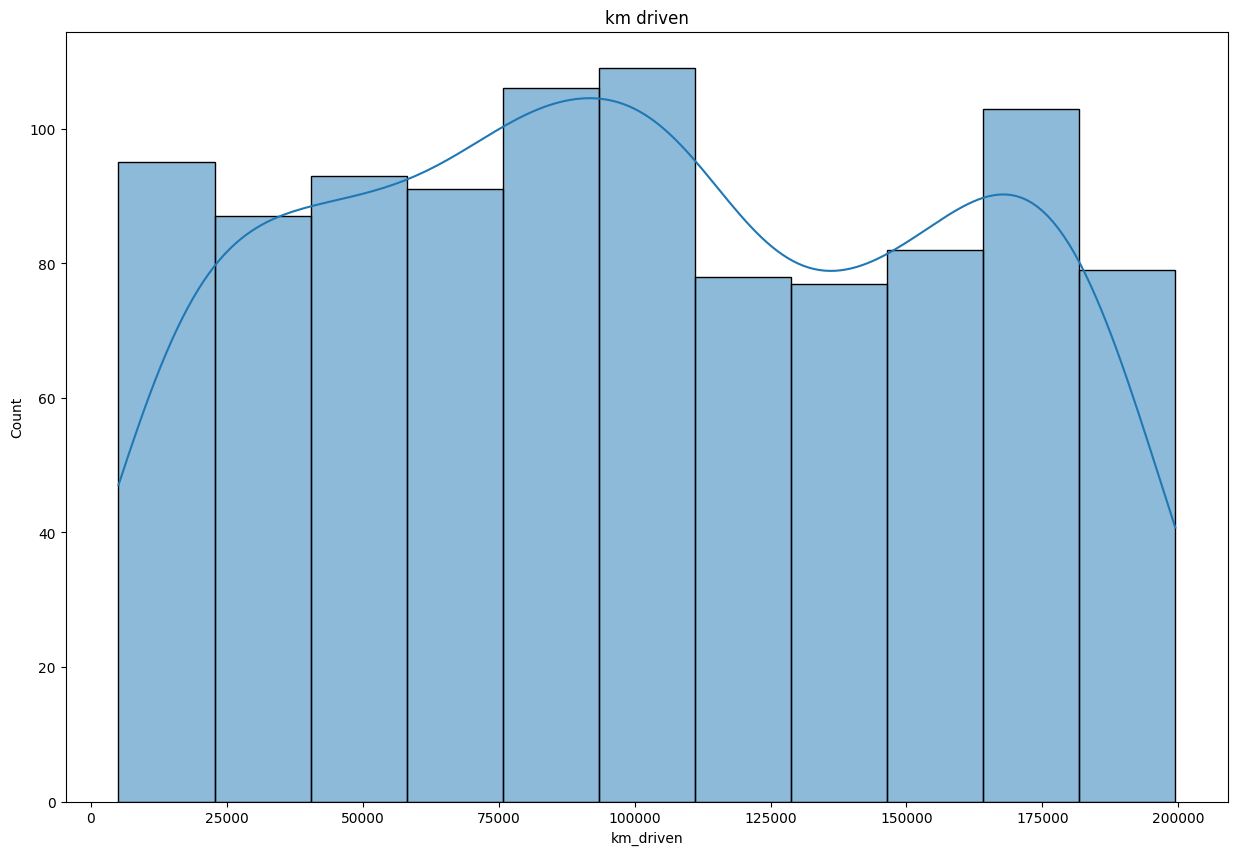

In [45]:
plt.figure(figsize=(15,10))
sns.histplot(x=df['km_driven'],kde=True)
plt.title("km driven")
plt.show()

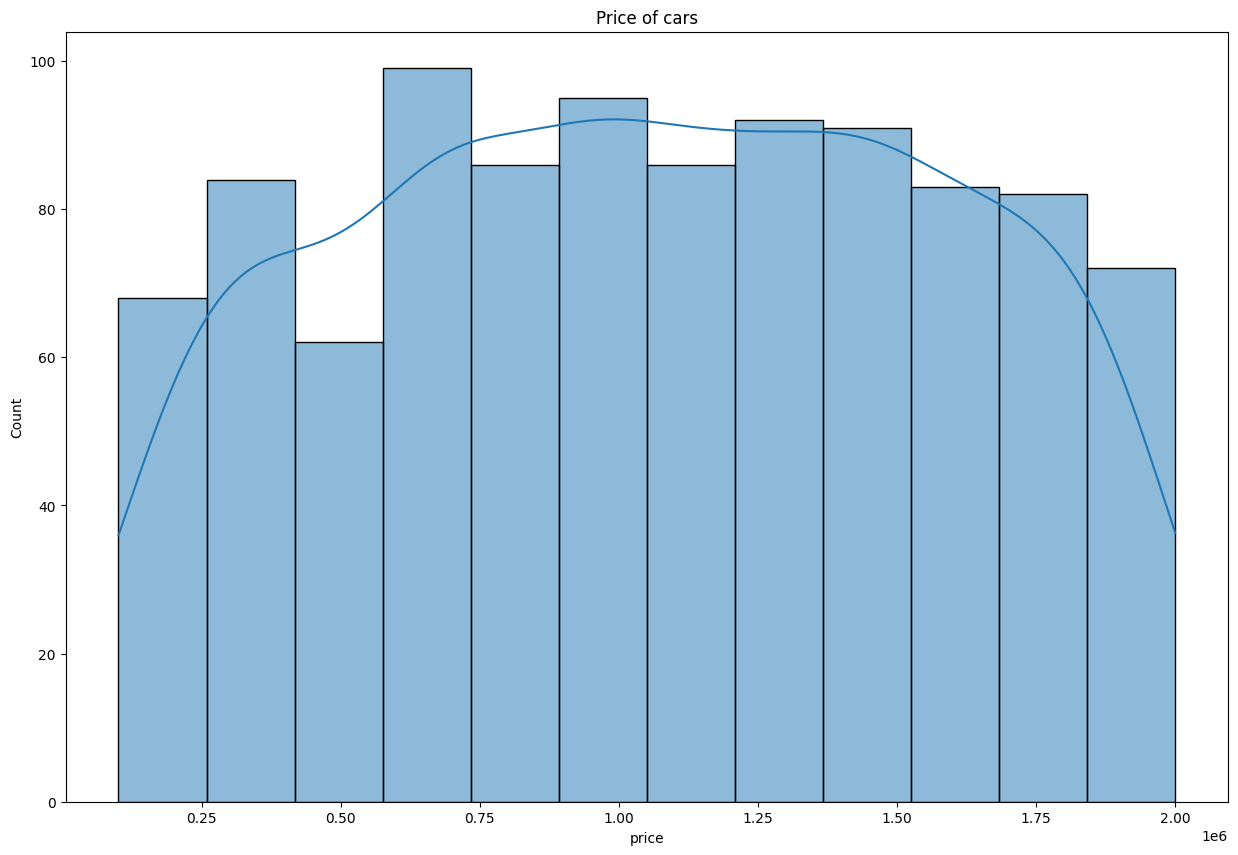

In [46]:
plt.figure(figsize=(15,10))
sns.histplot(x=df['price'],kde=True)
plt.title("Price of cars")
plt.show()

In [47]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_brand     900 non-null    str    
 1   fuel_type     693 non-null    str    
 2   transmission  795 non-null    str    
 3   owner_type    1000 non-null   str    
 4   city          860 non-null    str    
 5   year          1000 non-null   int64  
 6   km_driven     1000 non-null   float64
 7   price         1000 non-null   int64  
dtypes: float64(1), int64(2), str(5)
memory usage: 62.6 KB


In [49]:
df.head(10)

,car_brand,fuel_type,transmission,owner_type,city,year,km_driven,price
0,Toyota,Petrol,Manual,Third,Hyderabad,2020,185905.0,220627
1,NaN,CNG,Manual,First,Bangalore,2009,28723.0,915977
2,BMW,NaN,NaN,First,NaN,2020,133921.0,598953
3,Mahindra,NaN,Manual,Third,NaN,2007,112791.0,1449397
4,Hyundai,NaN,Manual,Second,NaN,2019,150693.0,1383644
5,Hyundai,Electric,Automatic,Third,Kolkata,2007,52657.0,494775
6,Maruti,Electric,Automatic,Third,Kolkata,2018,102352.0,581247
7,Audi,NaN,Automatic,Second,Mumbai,2020,48162.0,1059991
8,Ford,Diesel,Manual,Third,Bangalore,2021,30345.0,1247419
9,BMW,CNG,Automatic,Third,Chennai,2022,46846.0,1863796


In [50]:
df['city'].mode()

0    Bangalore
Name: city, dtype: str

In [52]:
df.city.isna().sum()

np.int64(140)

Since 140 values are missing ie 14%. So it is a significant value 

Therefore placing unknown instead of empty values

In [55]:
df['city'] = df['city'].fillna('Unknown')

In [56]:
df['city'].head()

0    Hyderabad
1    Bangalore
2      Unknown
3      Unknown
4      Unknown
Name: city, dtype: str

In [57]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_brand     900 non-null    str    
 1   fuel_type     693 non-null    str    
 2   transmission  795 non-null    str    
 3   owner_type    1000 non-null   str    
 4   city          1000 non-null   str    
 5   year          1000 non-null   int64  
 6   km_driven     1000 non-null   float64
 7   price         1000 non-null   int64  
dtypes: float64(1), int64(2), str(5)
memory usage: 62.6 KB


In [58]:
df.owner_type.unique()

<StringArray>
['Third', 'First', 'Second']
Length: 3, dtype: str

In [62]:
owner_mapping = {
    'First' : 1,
    'Second' : 2,
    'Third' : 3
}

In [64]:
df['owner_type'] = df['owner_type'].map(owner_mapping)

In [65]:
df['owner_type'].head()

0    3
1    1
2    1
3    3
4    2
Name: owner_type, dtype: int64

In [66]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_brand     900 non-null    str    
 1   fuel_type     693 non-null    str    
 2   transmission  795 non-null    str    
 3   owner_type    1000 non-null   int64  
 4   city          1000 non-null   str    
 5   year          1000 non-null   int64  
 6   km_driven     1000 non-null   float64
 7   price         1000 non-null   int64  
dtypes: float64(1), int64(3), str(4)
memory usage: 62.6 KB


In [67]:
df['transmission'].unique()

<StringArray>
['Manual', nan, 'Automatic']
Length: 3, dtype: str

In [68]:
df['transmission'].isna().sum()

np.int64(205)

In [72]:
df['transmission'].value_counts()

transmission
Manual       398
Automatic    397
Name: count, dtype: int64

In [73]:
df['transmission'] = df['transmission'].fillna('Unknown')

In [75]:
df['transmission'].value_counts(normalize=True)*100

transmission
Manual       39.8
Automatic    39.7
Unknown      20.5
Name: proportion, dtype: float64

In [76]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_brand     900 non-null    str    
 1   fuel_type     693 non-null    str    
 2   transmission  1000 non-null   str    
 3   owner_type    1000 non-null   int64  
 4   city          1000 non-null   str    
 5   year          1000 non-null   int64  
 6   km_driven     1000 non-null   float64
 7   price         1000 non-null   int64  
dtypes: float64(1), int64(3), str(4)
memory usage: 62.6 KB


In [78]:
df['fuel_type'].unique()

<StringArray>
['Petrol', 'CNG', nan, 'Electric', 'Diesel']
Length: 5, dtype: str

In [79]:
df['fuel_type'].value_counts()

fuel_type
Petrol      203
CNG         185
Diesel      182
Electric    123
Name: count, dtype: int64

In [80]:
df['fuel_type'].isna().sum()

np.int64(307)

In [81]:
df['fuel_type'] = df['fuel_type'].fillna('Unknown')

In [82]:
df.fuel_type.head(10)

0      Petrol
1         CNG
2     Unknown
3     Unknown
4     Unknown
5    Electric
6    Electric
7     Unknown
8      Diesel
9         CNG
Name: fuel_type, dtype: str

In [83]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_brand     900 non-null    str    
 1   fuel_type     1000 non-null   str    
 2   transmission  1000 non-null   str    
 3   owner_type    1000 non-null   int64  
 4   city          1000 non-null   str    
 5   year          1000 non-null   int64  
 6   km_driven     1000 non-null   float64
 7   price         1000 non-null   int64  
dtypes: float64(1), int64(3), str(4)
memory usage: 62.6 KB


In [84]:
df['car_brand'].unique()

<StringArray>
[  'Toyota',        nan,      'BMW', 'Mahindra',  'Hyundai',   'Maruti',
     'Audi',     'Ford',    'Honda',     'Tata']
Length: 10, dtype: str

In [85]:
df['car_brand'].value_counts()

car_brand
Hyundai     117
Mahindra    110
Maruti      108
Toyota      102
Audi         99
Ford         99
Honda        94
BMW          89
Tata         82
Name: count, dtype: int64

In [89]:
df['car_brand'].value_counts(normalize=True)*100

car_brand
Hyundai     13.000000
Mahindra    12.222222
Maruti      12.000000
Toyota      11.333333
Audi        11.000000
Ford        11.000000
Honda       10.444444
BMW          9.888889
Tata         9.111111
Name: proportion, dtype: float64

Here all the brands are having similar sold percentage.
- Imputing mode is not a good option as missing percentage ~10%
- Grouping by year and car_brand and then imputing that specific brand is also not good option as they share similar percentage  

In [92]:
df['car_brand'] = df['car_brand'].fillna('Unknown')

In [93]:
df['car_brand'].head(10)

0      Toyota
1     Unknown
2         BMW
3    Mahindra
4     Hyundai
5     Hyundai
6      Maruti
7        Audi
8        Ford
9         BMW
Name: car_brand, dtype: str

In [94]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_brand     1000 non-null   str    
 1   fuel_type     1000 non-null   str    
 2   transmission  1000 non-null   str    
 3   owner_type    1000 non-null   int64  
 4   city          1000 non-null   str    
 5   year          1000 non-null   int64  
 6   km_driven     1000 non-null   float64
 7   price         1000 non-null   int64  
dtypes: float64(1), int64(3), str(4)
memory usage: 62.6 KB


In [98]:
df.to_csv("data/cleaned/used_car_sales_cleaned.csv")